## 패키지 불러오기

In [1]:
from pandas import DataFrame,read_csv,read_excel,merge,melt,pivot_table
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import sys
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency,t
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA #주성분 분석용 패키지
from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from factor_analyzer.factor_analyzer import calculate_kmo

sys.path.append("../../../") # helper 모듈의 위치 확인 후 입력 결정
import helper

## 폰트 세팅

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

## 데이터

In [4]:
origin=read_excel('./행정동병합테스트22.xlsx')
origin.head()

,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,의료기관_수,...,아동인구(0~9세),노인인구(65세이상),장애인_인구,세대당공원면적,보육시설수,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,11,...,612,2154,437,337.55,4,0.352898,0,32,0,3
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,75,...,488,1808,267,60.79,0,0.063554,0,27,0,12
2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,0,0,11,...,108,626,110,956.51,3,1.000000,0,16,0,5
3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,0,0,4,...,385,1814,311,0.00,3,0.000000,10,34,0,5
4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,0,0,15,...,1033,3495,491,1.14,3,0.001192,10,54,0,5


### 데이터타입 확인

In [5]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시도명            426 non-null    object 
 1   시군구코드          426 non-null    int64  
 2   시군구명           426 non-null    object 
 3   행정동코드          426 non-null    int64  
 4   행정동코드_수정       426 non-null    int64  
 5   읍면동명           426 non-null    object 
 6   생성일자           426 non-null    int64  
 7   말소일자           426 non-null    int64  
 8   지하철역_수         426 non-null    int64  
 9   의료기관_수         426 non-null    int64  
 10  사회복지시설_수       426 non-null    int64  
 11  계(명)           426 non-null    int64  
 12  면적 (k㎡)        426 non-null    float64
 13  구성비 (%)        426 non-null    float64
 14  행정동별_공원수       426 non-null    int64  
 15  공공체육시설_수       426 non-null    int64  
 16  문화시설_수         426 non-null    int64  
 17  학교_수           426 non-null    int64  
 18  사업체_수     

### 결측치 확인

In [6]:
origin.isna().sum()

시도명              0
시군구코드            0
시군구명             0
행정동코드            0
행정동코드_수정         0
읍면동명             0
생성일자             0
말소일자             0
지하철역_수           0
의료기관_수           0
사회복지시설_수         0
계(명)             0
면적 (k㎡)          0
구성비 (%)          0
행정동별_공원수         0
공공체육시설_수         0
문화시설_수           0
학교_수             0
사업체_수            0
개소 (공영+민영)       0
면수 (공영+민영)       0
하천및한강여부          0
아동인구(0~9세)       0
노인인구(65세이상)      0
장애인_인구           0
세대당공원면적          0
보육시설수            0
세대당공원면적minmax    0
수변점수             0
행정동별버스정류장수       0
행정동별유통업체수        0
공공자전거대여소수        0
dtype: int64

## 데이터 컬럼 전체 확인

In [7]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '행정동코드_수정', '읍면동명', '생성일자', '말소일자',
       '지하철역_수', '의료기관_수', '사회복지시설_수', '계(명)', '면적 (k㎡)', '구성비 (%)',
       '행정동별_공원수', '공공체육시설_수', '문화시설_수', '학교_수', '사업체_수', '개소 (공영+민영)',
       '면수 (공영+민영)', '하천및한강여부', '아동인구(0~9세)', '노인인구(65세이상)', '장애인_인구',
       '세대당공원면적', '보육시설수', '세대당공원면적minmax', '수변점수', '행정동별버스정류장수', '행정동별유통업체수',
       '공공자전거대여소수'],
      dtype='object')

### `하천및한강여부` 값 확인 후 0/1로 설정

In [ ]:
origin['하천및한강여부'].value_counts()

In [14]:
origin['하천및한강여부'].replace({'유': '1'}, inplace=True)

### 데이터프레임 복사

In [15]:
df1=origin.copy()

### 기초 통계량 확인

In [16]:
df1.describe()

,시군구코드,행정동코드,행정동코드_수정,생성일자,말소일자,지하철역_수,의료기관_수,사회복지시설_수,계(명),면적 (k㎡),...,아동인구(0~9세),노인인구(65세이상),장애인_인구,세대당공원면적,보육시설수,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수
count,426.000000,4.260000e+02,4.260000e+02,4.260000e+02,426.0,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,11433.521127,1.143415e+09,1.143415e+07,1.993527e+07,0.0,0.741784,40.187793,5.784038,22674.464789,1.420751,...,1245.509390,3914.110329,919.823944,23.567394,11.025822,0.024639,6.610329,26.478873,1.068075,6.450704
std,192.086184,1.920776e+07,1.920776e+05,8.838731e+04,0.0,0.991251,47.262695,4.523958,9061.737866,1.569773,...,776.382717,1595.727172,490.468568,91.821912,6.396454,0.095997,4.343302,15.080046,1.686644,5.504963
min,11110.000000,1.111052e+09,1.111052e+07,1.988042e+07,0.0,0.000000,0.000000,0.000000,70.000000,0.230000,...,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,11260.000000,1.126066e+09,1.126066e+07,1.988042e+07,0.0,0.000000,18.000000,2.000000,16703.500000,0.670000,...,717.250000,2844.750000,560.500000,0.280000,7.000000,0.000293,1.000000,15.000000,0.000000,3.000000
50%,11440.000000,1.144064e+09,1.144064e+07,1.988042e+07,0.0,0.000000,31.000000,5.000000,21978.500000,0.975000,...,1061.500000,3717.000000,812.000000,1.105000,10.000000,0.001155,10.000000,24.000000,1.000000,5.000000
75%,11612.500000,1.161306e+09,1.161306e+07,1.995030e+07,0.0,1.000000,48.000000,8.000000,27909.750000,1.490000,...,1594.750000,4842.750000,1215.500000,6.737500,14.000000,0.007044,10.000000,33.750000,1.000000,8.000000
max,11740.000000,1.174070e+09,1.174070e+07,2.022122e+07,0.0,7.000000,640.000000,27.000000,54896.000000,12.680000,...,6505.000000,8750.000000,3649.000000,956.510000,39.000000,1.000000,10.000000,104.000000,16.000000,46.000000


> 기초통계량을 확인함으로 데이터 값을 요약, 연관성을 파악, 예측을 진행

## KMO 검정

### KMO 검정을 위해(각 변수별 상관관계 있는지) 필요없는 변수 제외

In [23]:
df2=df1.drop(['시도명','시군구코드','행정동코드_수정','생성일자','시군구명','행정동코드','읍면동명','말소일자','세대당공원면적minmax'],axis=1)
df2

,지하철역_수,의료기관_수,사회복지시설_수,계(명),면적 (k㎡),구성비 (%),행정동별_공원수,공공체육시설_수,문화시설_수,학교_수,...,하천및한강여부,아동인구(0~9세),노인인구(65세이상),장애인_인구,세대당공원면적,보육시설수,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수
0,0,11,5,11700,2.57,0.42,2,10,6,8,...,0,612,2154,437,337.55,4,0,32,0,3
1,2,75,1,9362,1.23,0.20,3,8,13,2,...,0,488,1808,267,60.79,0,0,27,0,12
2,0,11,0,2576,1.49,0.25,1,2,31,2,...,0,108,626,110,956.51,3,0,16,0,5
3,0,4,4,9377,2.27,0.38,1,5,5,4,...,1,385,1814,311,0.00,3,10,34,0,5
4,0,15,11,17658,8.87,1.47,0,5,11,4,...,1,1033,3495,491,1.14,3,10,54,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,3,62,6,23303,0.67,0.11,0,0,2,0,...,1,897,4469,1075,0.18,9,4,18,1,5
422,1,80,6,22882,0.71,0.12,0,0,1,0,...,1,1024,4098,913,0.35,11,9,15,1,6
423,1,103,11,45142,1.61,0.27,1,1,1,4,...,0,2061,8478,1988,4.11,17,0,36,2,7
424,1,1,0,70,0.92,0.15,0,0,0,4,...,1,1,11,3,0.00,0,7,9,0,4


In [28]:
test1=read_excel('test11.xlsx')
test1.head()

,지하철역수,의료기관수,사회복지시설수,계(명),면적,구성비,행정동별공원수,공공체육시설수,문화시설수,학교수,...,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,보육시설수,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수
0,0,11,5,11700,2.57,0.42,2,10,6,8,...,0,612,2154,437,337.55,4,0,32,0,3
1,2,75,1,9362,1.23,0.20,3,8,13,2,...,0,488,1808,267,60.79,0,0,27,0,12
2,0,11,0,2576,1.49,0.25,1,2,31,2,...,0,108,626,110,956.51,3,0,16,0,5
3,0,4,4,9377,2.27,0.38,1,5,5,4,...,1,385,1814,311,0.00,3,10,34,0,5
4,0,15,11,17658,8.87,1.47,0,5,11,4,...,1,1033,3495,491,1.14,3,10,54,0,5


### KMO 검정 실행

In [29]:
kmo_per_variable, kmo_total = calculate_kmo(test1)
print("KMO per variable:", kmo_per_variable)
print("KMO total:", kmo_total)

KMO per variable: [0.81154158 0.84485096 0.85714134 0.80320112 0.71828195 0.71847643
 0.89225641 0.85781337 0.73776263 0.86157686 0.71131632 0.58317042
 0.88526733 0.53855615 0.76105185 0.81231258 0.7773042  0.8817764
 0.89070235 0.53780954 0.93426634 0.67397699 0.87480613]
KMO total: 0.7883055659379768


> `kmo 검정 결과 1개의 변수를 제외한 나머지는 전부 0.6 이상 나오며 전체 평균은 0.75로 전부 사용가능한 것으로 판단`

## 이상치 확인 및 스케일링 판단용 boxplot

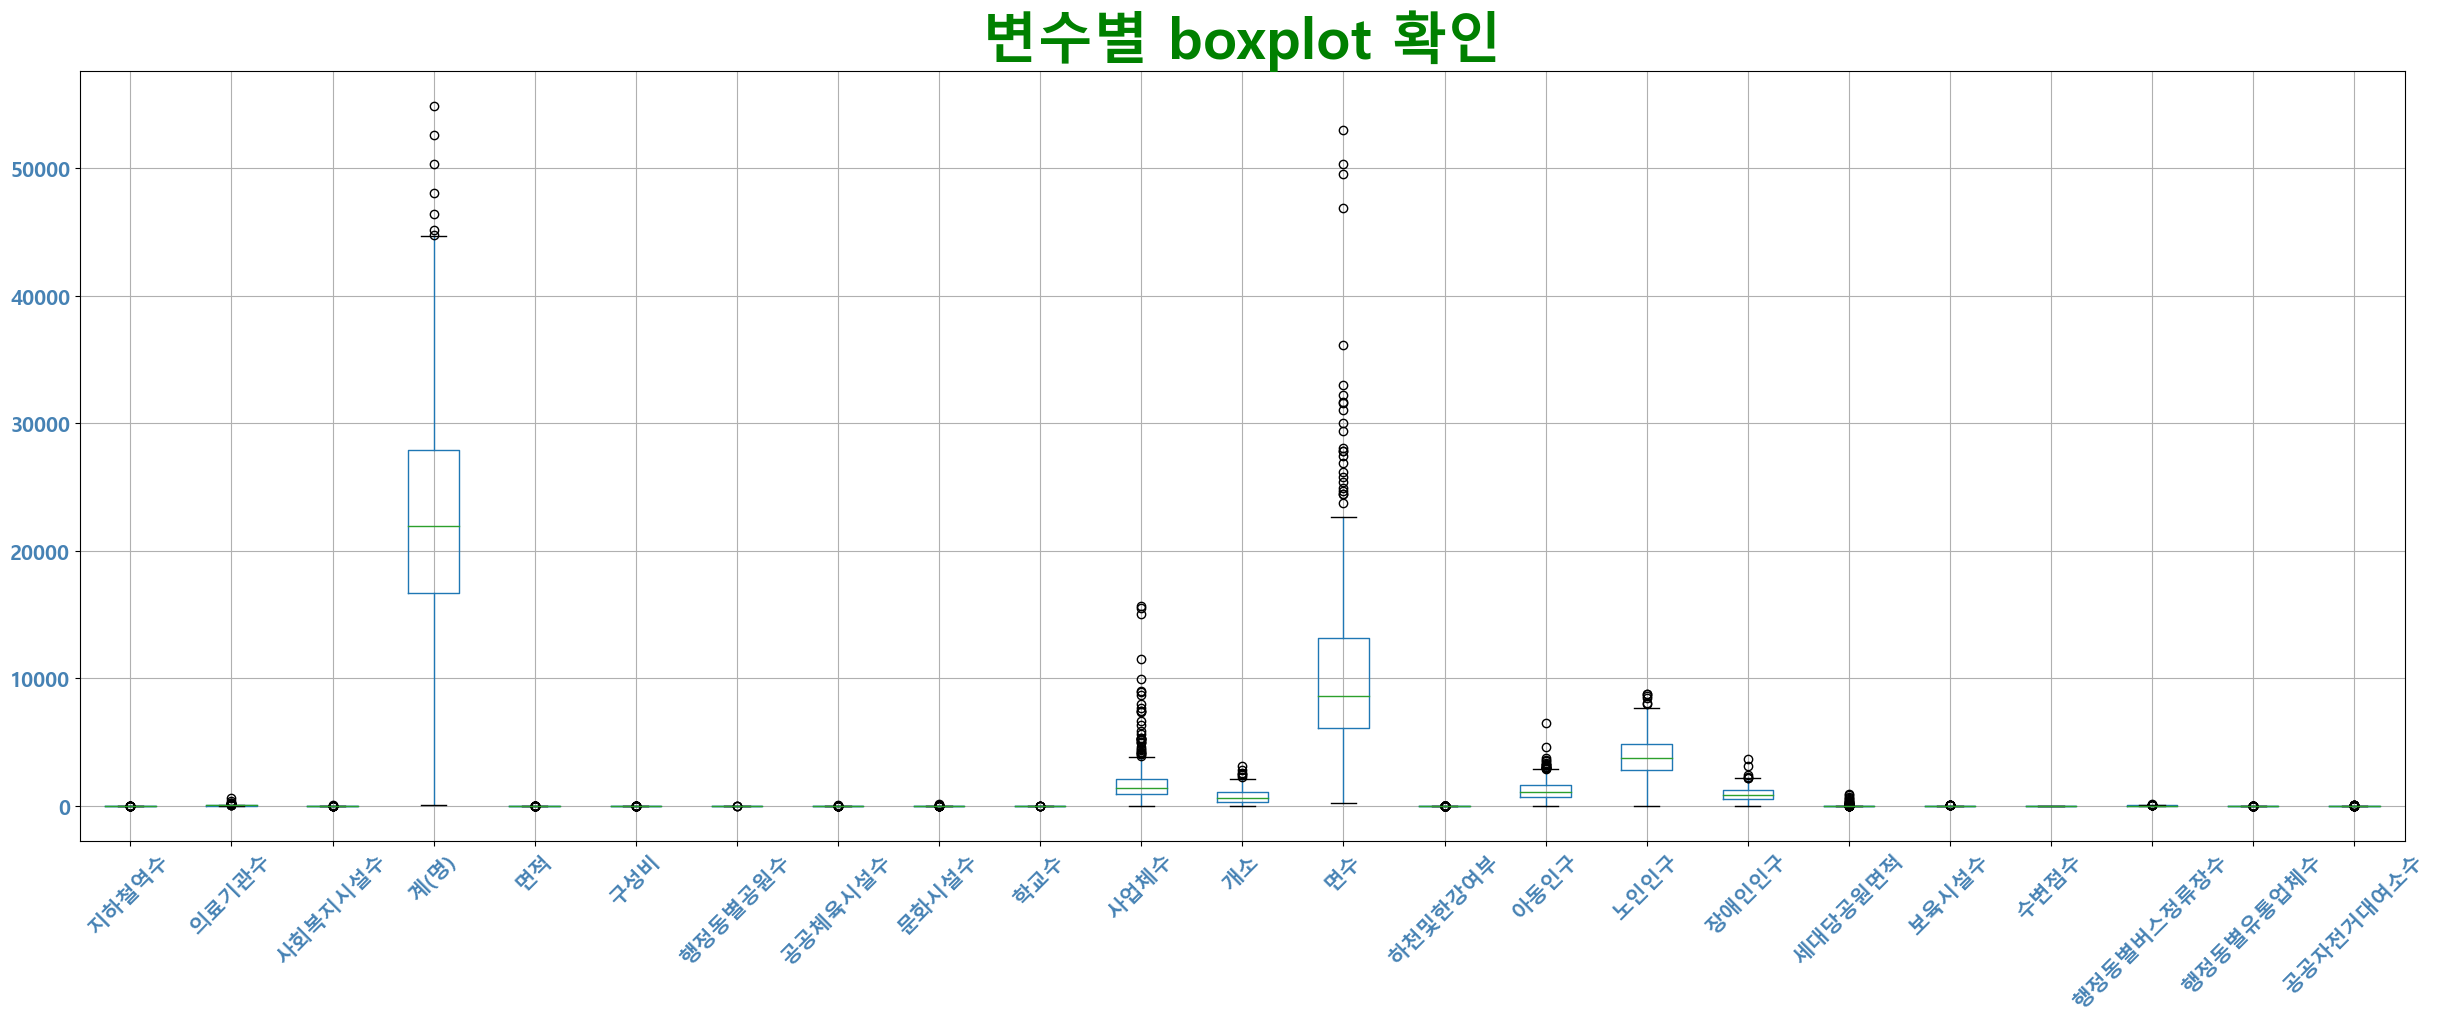

In [40]:
plt.figure(figsize=(30,10))
test1.boxplot()
plt.title('변수별 boxplot 확인',color='green',fontsize=40,fontweight='bold')
plt.xticks(rotation=45,color='steelblue',fontsize=15,fontweight='bold')
plt.yticks(color='steelblue',fontsize=15,fontweight='bold')
plt.show()
plt.close()

> 표준화 필요, 이상치로 의심되는 값이 존재하지만 실제 기관에서 조사/발췌한 내용인 만큼 이상치가 아닌 정상 값으로 판단해 이상치 처리는 반려하기로 결정.

### 상관관계 확인을 위해 히트맵으로 결과 시각화

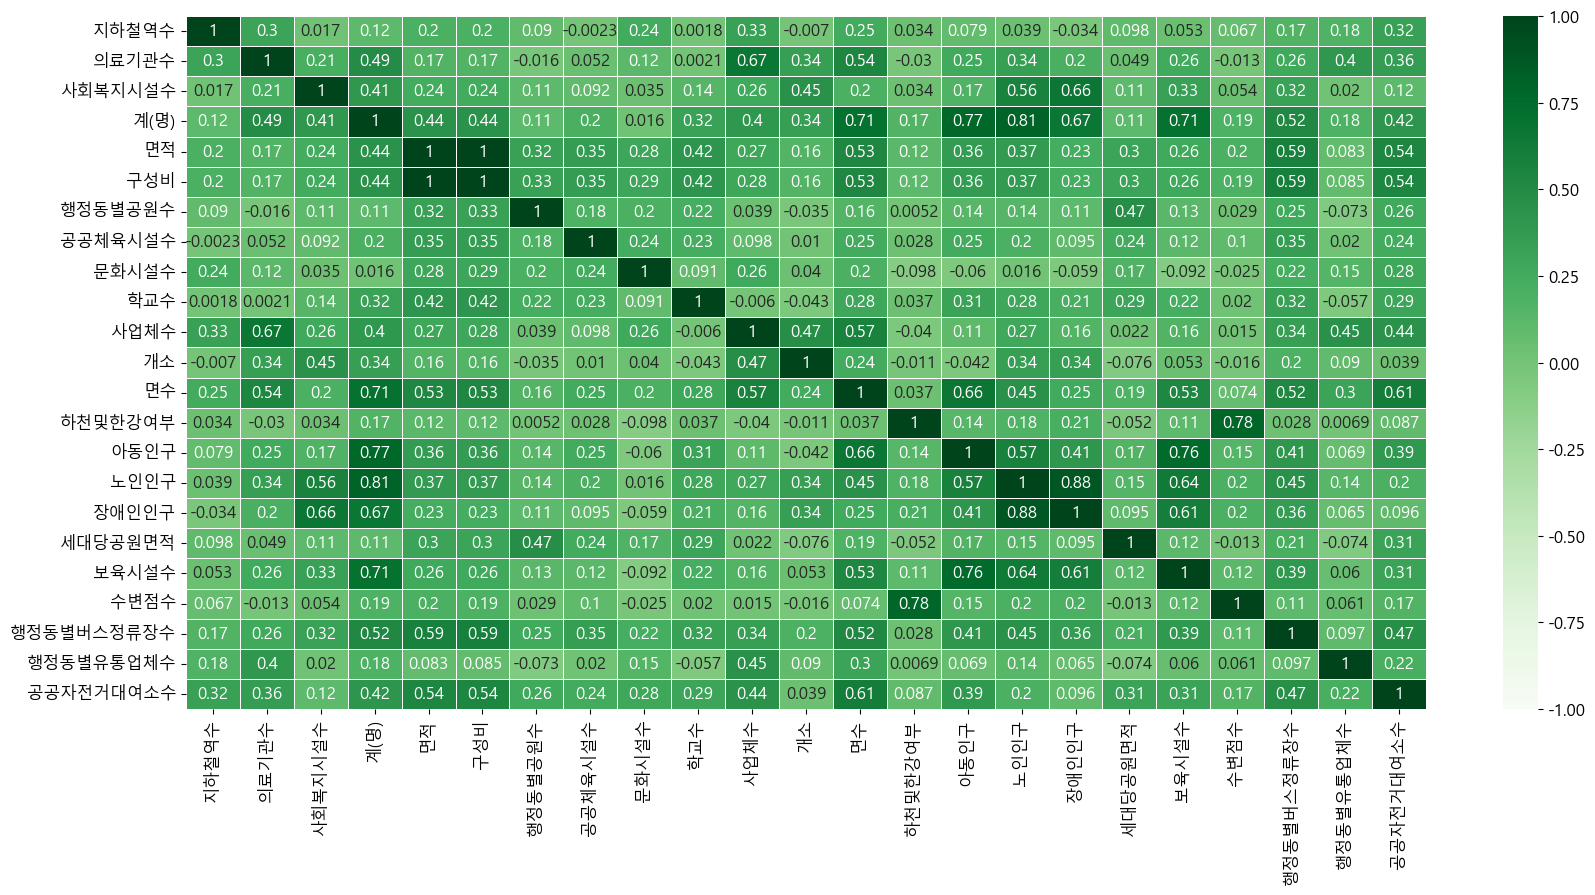

In [41]:
corr = test1.corr(method='spearman')
corr.head()
plt.rcParams["figure.figsize"] = (20,9)
sb.heatmap(corr, annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

> 도시기본계획에서 가장 중요한 요소로 선정된 것은 역세권, <br> 즉 해당 지역에 지하철역 수가 가장 큰 영향을 미칠것으로 가정하고 <br>  지하철역 수를 종속변수로 채택하여 회귀분석으로 진행해봄

## 회귀분석

### 각 컬럼별 히스토그램으로 확인

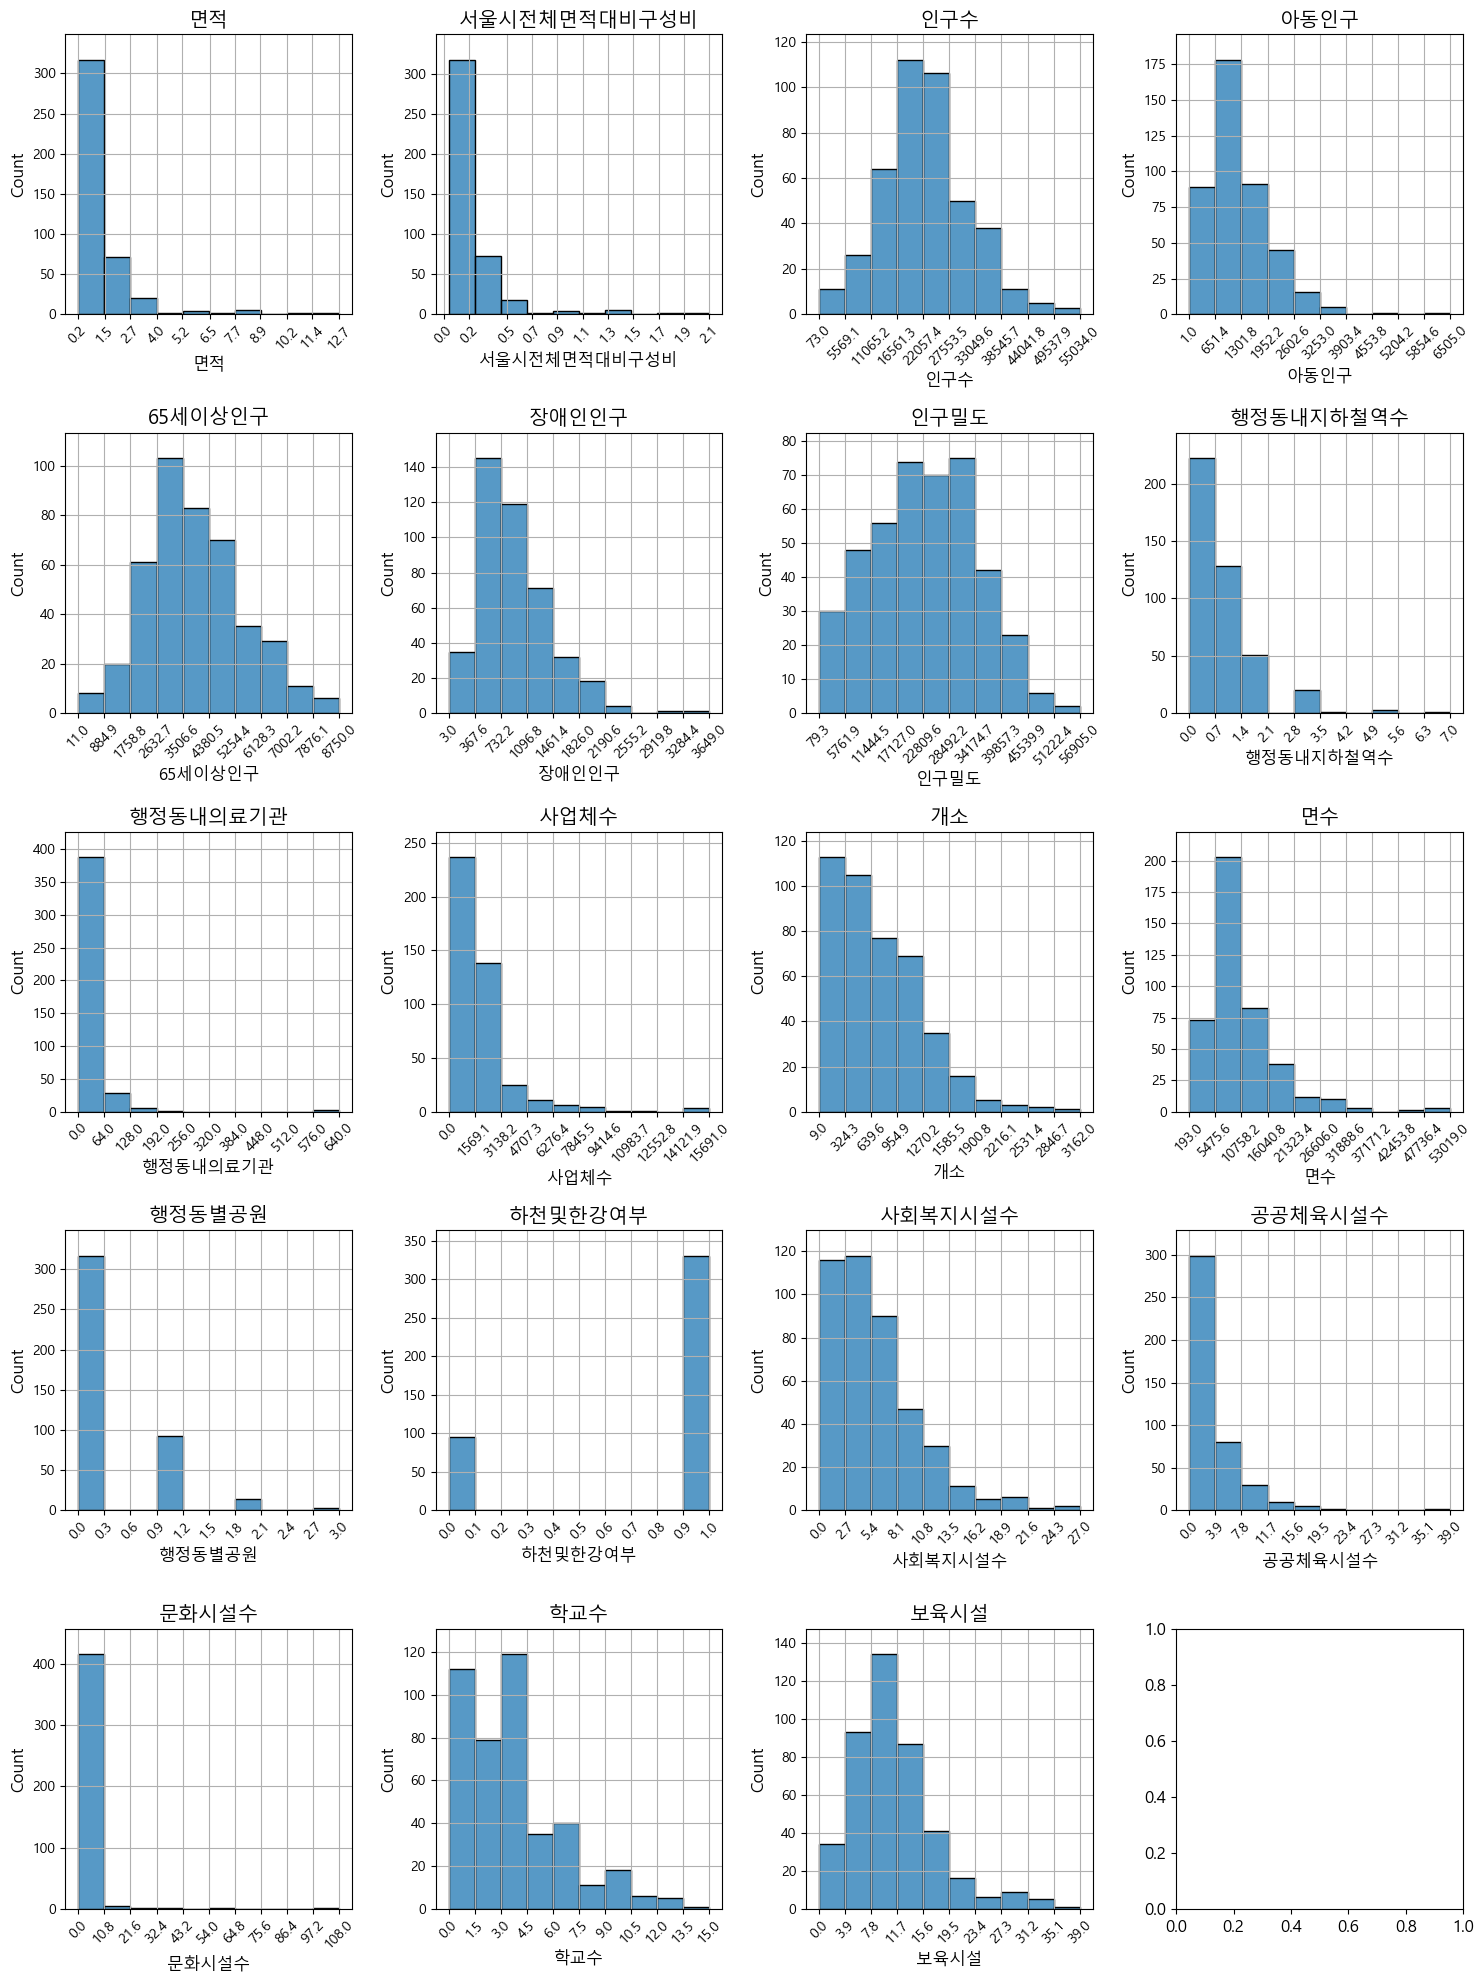

In [50]:
# 데이터를 정리해서 볼 수 있도록 도수분포표(히스토그램) 확인

# 히스토그램과 bins(구간) 설정
num_bins = 10
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))  # 5x3 서브플롯 생성

for ax, column in zip(axes.flat, df2.columns):
    hist, bins = np.histogram(df2[column], bins=num_bins)
    bins2 = np.round(bins, 1)

    sb.histplot(data=df2, x=column, bins=num_bins, kde=False, ax=ax) #확률밀도곡선 미표시(티가 안 남)
    ax.set_title(column)  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_xticklabels(bins2, rotation=45, fontsize=10)  # x축 눈금 라벨(각도 45도), 폰트 설정
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 설정

    # y축 범위 설정(여유 범위를 넣어야 가독성이 좋아짐)
    y_max = hist.max() + hist.max() * 0.1  # 최대 도수에 10% 여유를 더한 값으로 y축 최댓값 설정
    ax.set_ylim(0, y_max)  # y축 범위 설정
    ax.grid(True) # 격자 표시

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

### reg플롯으로 추세선 확인해보기

C:\Users\kiman\AppData\Local\Temp\ipykernel_1252\2686585274.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # 그래프 간격 조정


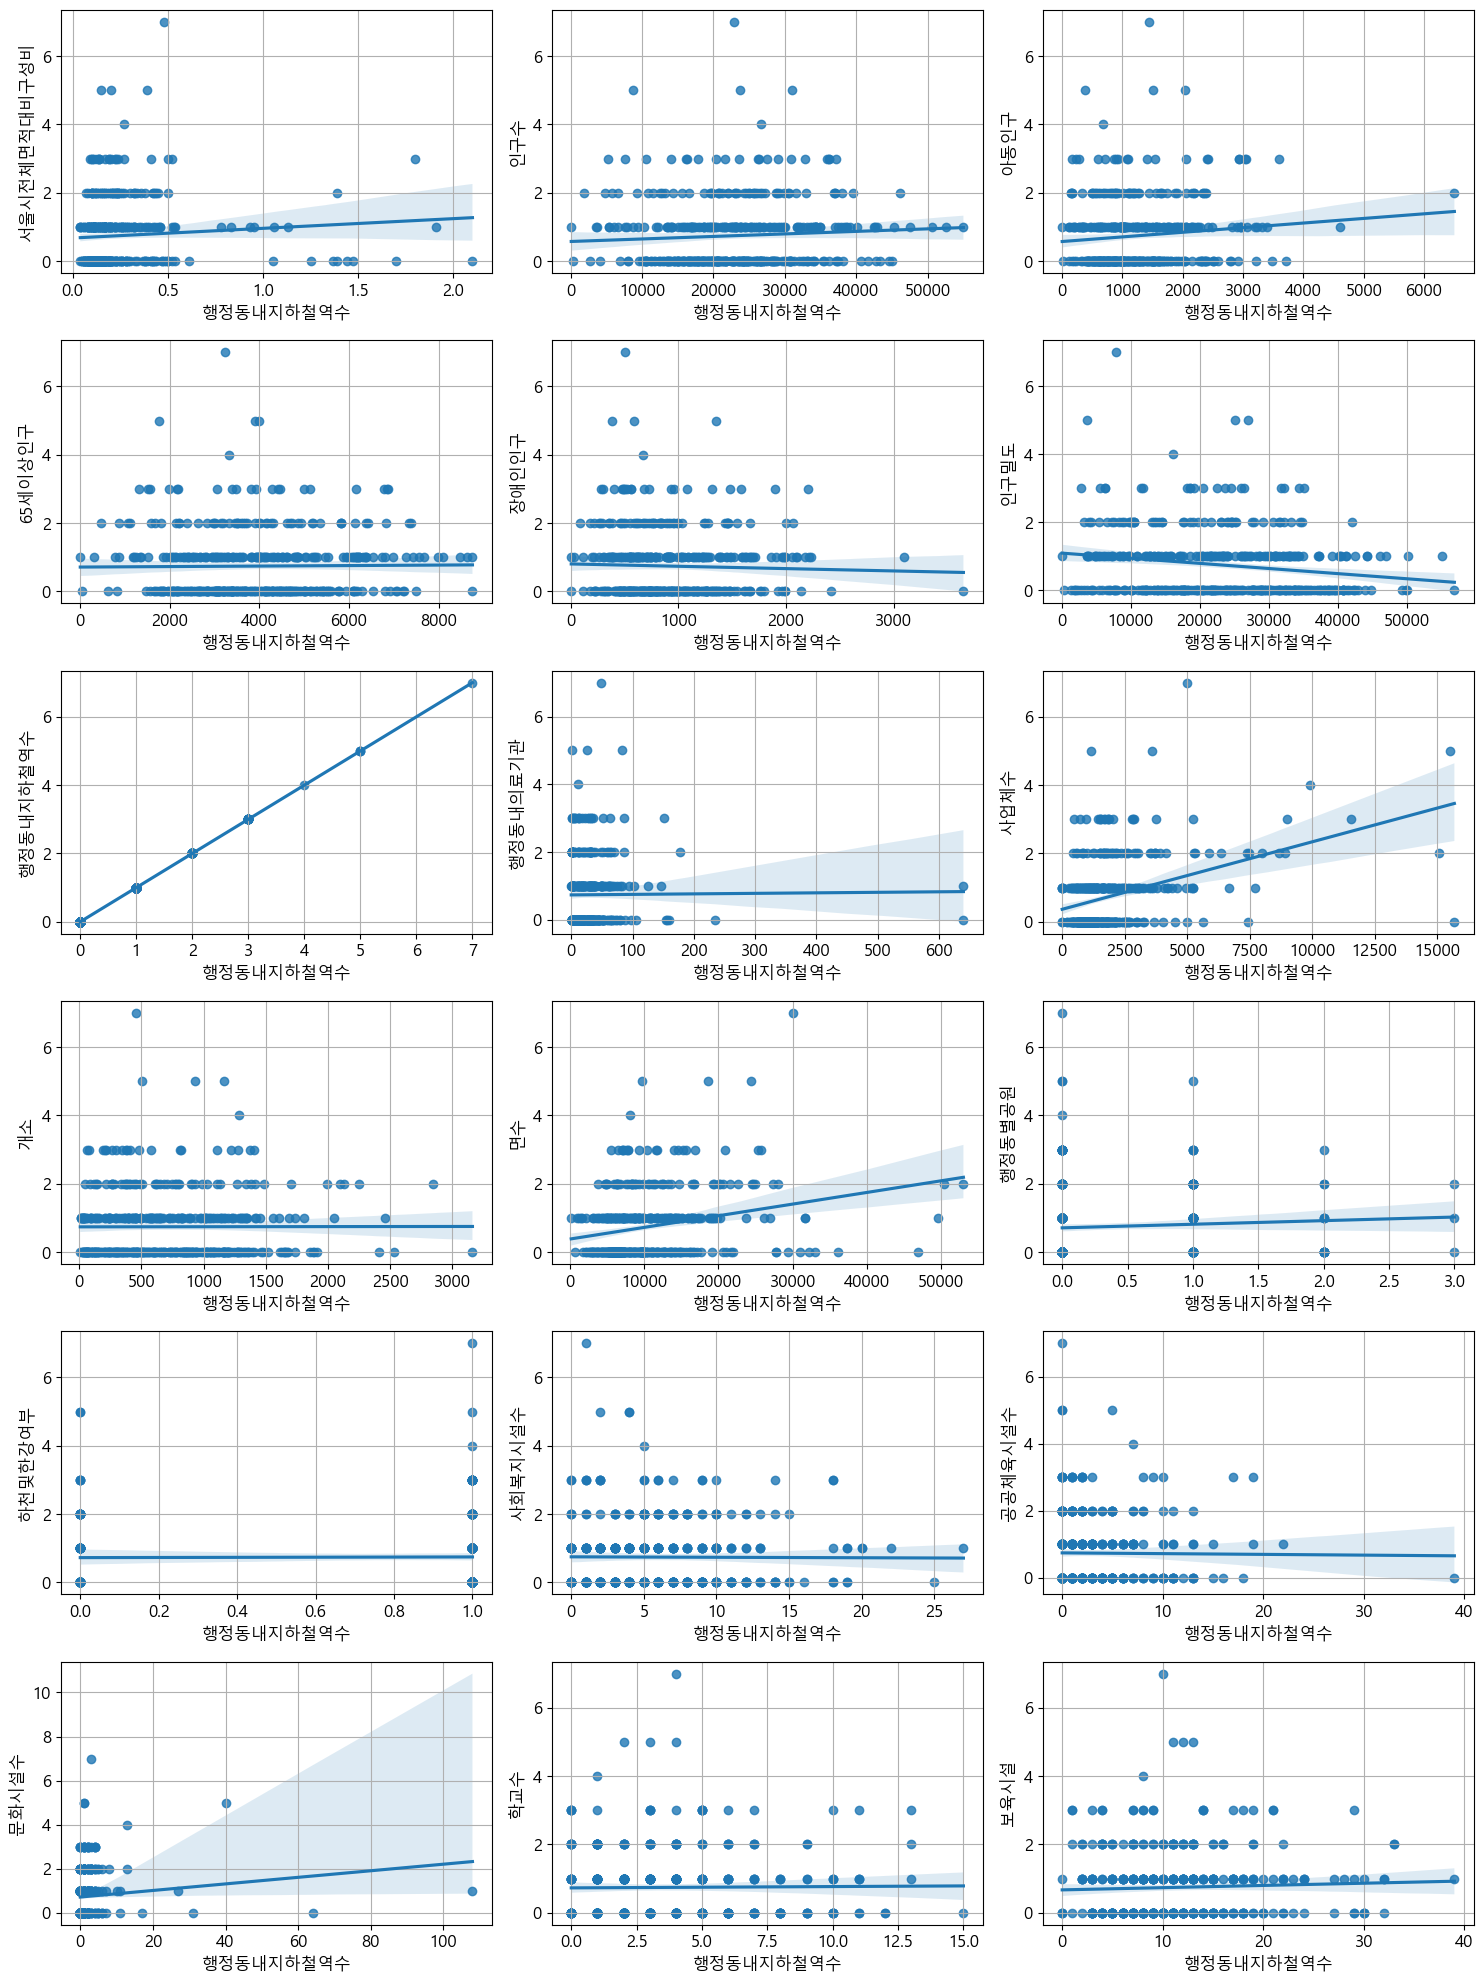

In [51]:
# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리기 때문에 1부터 시작
columns = list(df2.columns)[1:]

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# 종속변수 설정
dependent_variable = '행정동내지하철역수'

for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    sb.regplot(data=df2, y=dependent_variable, x=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    plt.tight_layout() # 그래프 간격 조정
    ax[row, col].grid() # 격자표시

plt.show()
plt.close()


### 스피어만 상관분석 실행

> 각 변수의 상관성 확인, 두 변수의 순위 사이의 통계적 의존성을 측정

In [52]:
helper.spearman_r(df2)

+----------------------------------------+-------------+--------------+----------+
| fields                                 |   statistic |       pvalue | result   |
|----------------------------------------+-------------+--------------+----------|
| 면적 vs 서울시전체면적대비구성비       |    0.999183 |            0 | True     |
| 서울시전체면적대비구성비 vs 인구수     |     0.43411 |  5.25702e-21 | True     |
| 인구수 vs 아동인구                     |    0.747458 |  2.50289e-77 | True     |
| 아동인구 vs 65세이상인구               |    0.574024 |  1.05461e-38 | True     |
| 65세이상인구 vs 장애인인구             |    0.873669 | 9.48481e-135 | True     |
| 장애인인구 vs 인구밀도                 |    0.212592 |  9.61581e-06 | True     |
| 인구밀도 vs 행정동내지하철역수         |   -0.163557 |  0.000702231 | True     |
| 행정동내지하철역수 vs 행정동내의료기관 |  0.00409005 |     0.932921 | False    |
| 행정동내의료기관 vs 사업체수           |  -0.0649149 |     0.181124 | False    |
| 사업체수 vs 개소                       |     0.47361 |  3.33794e-25 | True     |
| 개소 vs 면수                       

### 각 데이터별 타입 확인

In [53]:
cnames = []
dtypes = df2.dtypes

for i, v in enumerate(dtypes):
    if v != 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

면적 float64
서울시전체면적대비구성비 float64
인구수 int64
아동인구 int64
65세이상인구 int64
장애인인구 int64
인구밀도 float64
행정동내지하철역수 int64
행정동내의료기관 int64
사업체수 int64
개소 int64
면수 int64
행정동별공원 int64
하천및한강여부 int64
사회복지시설수 int64
공공체육시설수 int64
문화시설수 int64
학교수 int64
보육시설 int64
['면적', '서울시전체면적대비구성비', '인구수', '아동인구', '65세이상인구', '장애인인구', '인구밀도', '행정동내지하철역수', '행정동내의료기관', '사업체수', '개소', '면수', '행정동별공원', '하천및한강여부', '사회복지시설수', '공공체육시설수', '문화시설수', '학교수', '보육시설']


### 데이터 정규화 실행

In [54]:
# 데이터 정규화 진행

x_train_std_df, y_train_std_df = helper.scalling(df2[cnames], '행정동내지하철역수')
x_train_std_df.head()

,면적,서울시전체면적대비구성비,인구수,아동인구,65세이상인구,장애인인구,인구밀도,행정동내의료기관,사업체수,개소,면수,행정동별공원,하천및한강여부,사회복지시설수,공공체육시설수,문화시설수,학교수,보육시설
0,0.732972,0.714129,-1.209019,-0.822284,-1.104595,-0.985005,-1.615171,0.912321,-0.479910,-0.098808,-0.833069,3.004452,-1.866604,-0.173512,1.695537,0.605050,1.621907,-1.111423
1,-0.121658,-0.134352,-1.482731,-0.982732,-1.321667,-1.331701,-1.351705,-0.337982,0.851906,-0.679943,0.284003,4.774710,-1.866604,-1.058733,1.212555,1.630780,-0.535010,-0.009607
2,0.044166,0.058485,-2.228741,-1.474426,-2.063226,-1.651885,-1.862696,-0.474733,-0.628822,-0.716026,-1.161373,1.234194,-1.866604,-1.280038,-0.236389,4.268372,-0.535010,-1.268825
3,0.541637,0.559860,-1.462616,-1.116007,-1.317903,-1.241968,-1.650001,-0.259838,-0.707472,-0.235546,-0.980701,1.234194,0.535732,-0.394817,0.488083,0.458517,0.183962,-1.268825
4,4.751010,4.763698,-0.537799,-0.277539,-0.263284,-0.874878,-1.841656,-0.435661,-0.608373,1.703468,-0.164192,-0.536064,0.535732,1.154320,0.488083,1.337714,0.183962,-1.268825


### 정규화된 데이터 확인

In [55]:
y_train_std_df

,행정동내지하철역수
0,-0.749211
1,1.270813
2,-0.749211
3,-0.749211
4,-0.749211
...,...
421,2.280825
422,0.260801
423,0.260801
424,0.260801


### 스케일링 데이터를 활용해 주성분분석(PCA) 진행

> 상관성을 확인

In [56]:
# # 표준화 결과를 활용하여 주성분 분석 수행
model = pca()
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [18] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [13] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [18] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,인구수,0.382019,best
1,PC2,인구밀도,-0.476615,best
2,PC3,사업체수,0.572786,best
3,PC4,사회복지시설수,0.468129,best
4,PC5,문화시설수,0.549370,best
5,PC6,행정동내의료기관,0.878047,best
6,PC7,하천및한강여부,0.775254,best
7,PC8,학교수,0.646535,best
8,PC9,공공체육시설수,-0.544818,best
9,PC10,개소,-0.492770,best


### 주성분 선정(추출)

In [57]:
# # 주성분 선정
best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
best_names

['사업체수',
 '인구수',
 '사회복지시설수',
 '학교수',
 '개소',
 '하천및한강여부',
 '공공체육시설수',
 '문화시설수',
 '인구밀도',
 '행정동내의료기관']

### best값+종속변수를 결합한 데이터 생성

In [65]:
# target_names 변수에 PCA분석을 통한 best값+종속변수를 결합
target_names = best_names + ['행정동내지하철역수']
target_names

['사업체수',
 '인구수',
 '사회복지시설수',
 '학교수',
 '개소',
 '하천및한강여부',
 '공공체육시설수',
 '문화시설수',
 '인구밀도',
 '행정동내의료기관',
 '행정동내지하철역수']

### 분석을 위해 정규화된 데이터 병합

In [67]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df3 = merge_df.filter(target_names)
df3.head()

,사업체수,인구수,사회복지시설수,학교수,개소,하천및한강여부,공공체육시설수,문화시설수,인구밀도,행정동내의료기관,행정동내지하철역수
0,-0.479910,-1.209019,-0.173512,1.621907,-0.098808,-1.866604,1.695537,0.605050,-1.615171,0.912321,-0.749211
1,0.851906,-1.482731,-1.058733,-0.535010,-0.679943,-1.866604,1.212555,1.630780,-1.351705,-0.337982,1.270813
2,-0.628822,-2.228741,-1.280038,-0.535010,-0.716026,-1.866604,-0.236389,4.268372,-1.862696,-0.474733,-0.749211
3,-0.707472,-1.462616,-0.394817,0.183962,-0.235546,0.535732,0.488083,0.458517,-1.650001,-0.259838,-0.749211
4,-0.608373,-0.537799,1.154320,0.183962,1.703468,0.535732,0.488083,1.337714,-1.841656,-0.435661,-0.749211


### `회귀분석 진행`

In [68]:
ols_result = helper.myOls(df3,y='행정동내지하철역수',x=best_names)
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:              행정동내지하철역수   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     9.185
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           9.18e-14
Time:                        12:07:30   Log-Likelihood:                -561.88
No. Observations:                 426   AIC:                             1146.
Df Residuals:                     415   BIC:                             1190.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.776e-17      0.044  -6.25e-16      1.0

### 회귀분석 결과 시각화

In [69]:
ols_result.table

B   표준오차         β        t   유의확률       VIF
종속변수      독립변수                                                        
행정동내지하철역수 사업체수       0.3766  0.050  0.376615   7.543*  0.000  1.436596
          인구수        0.1265  0.060  0.126485   2.105*  0.036  1.849617
          사회복지시설수   -0.0171  0.052 -0.017059  -0.329*  0.743  1.365052
          학교수       -0.0179  0.053 -0.017915  -0.341*  0.733  1.398512
          개소        -0.1321  0.053 -0.132063  -2.510*  0.012  1.424896
          하천및한강여부    0.0432  0.046  0.043209   0.933*  0.351  1.089757
          공공체육시설수   -0.0986  0.049 -0.098561  -2.001*  0.046  1.241859
          문화시설수      0.0552  0.048  0.055190   1.143*  0.254  1.184477
          인구밀도      -0.1317  0.053 -0.131711  -2.499*  0.013  1.428846
          행정동내의료기관  -0.0060  0.045 -0.005988  -0.133*  0.894  1.023252